Data Augmentation

Data Augmentation occurs when you create new data based on modification of your existing data. In our case , our data will be image.
Data Augmentation on images would include tranformation like:
Flipping the image either horizontally or vertically
Roatating the image
zooming in or out on the image
cropping the image
varying the color on the image

In [6]:
!pip install tensorflow

   ---------------------------------------- 0.0/390.3 MB ? eta -:--:--
   ---------------------------------------- 2.1/390.3 MB 11.7 MB/s eta 0:00:34
   ---------------------------------------- 4.7/390.3 MB 10.9 MB/s eta 0:00:36
    --------------------------------------- 6.8/390.3 MB 10.7 MB/s eta 0:00:36
    --------------------------------------- 8.7/390.3 MB 10.3 MB/s eta 0:00:37
   - -------------------------------------- 11.0/390.3 MB 10.3 MB/s eta 0:00:37
   - -------------------------------------- 12.8/390.3 MB 10.3 MB/s eta 0:00:37
   - -------------------------------------- 14.7/390.3 MB 9.9 MB/s eta 0:00:38
   - -------------------------------------- 16.8/390.3 MB 10.0 MB/s eta 0:00:38
   - -------------------------------------- 18.9/390.3 MB 9.8 MB/s eta 0:00:38
   -- ------------------------------------- 21.2/390.3 MB 10.1 MB/s eta 0:00:37
   -- ------------------------------------- 23.9/390.3 MB 10.1 MB/s eta 0:00:37
   -- ------------------------------------- 26.2/390.3 

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import imageio.v2 as imageio

%matplotlib inline


In [37]:
def plots(ims, figsize=(12, 6), rows=1, interp=False, titles=None):
    if isinstance(ims[0], np.ndarray):
        ims = np.array(ims).astype(np.uint8)
        if ims.ndim == 4 and ims.shape[-1] != 3:
            ims = ims.transpose((0, 2, 3, 1))
    f = plt.figure(figsize=figsize)
    cols = len(ims) // rows if len(ims) % rows == 0 else (len(ims) // rows) + 1
    
    for i in range(len(ims)):
          sp = f.add_subplot(rows, cols, i + 1)
          sp.axis('Off')
          if titles is not None:
               sp.set_title(titles[i], fontsize=16)
          plt.imshow(ims[i], interpolation=None if interp else 'none')
    
    plt.show()

In [38]:
gen = ImageDataGenerator(
    rotation_range=10, 
    width_shift_range=0.1,
    height_shift_range=0.1, 
    shear_range=0.15, 
    zoom_range=0.1,
    channel_shift_range=10., 
    horizontal_flip=True
)

In [39]:
image_path = 'a charming puppy dog in vibrant red sweater puppy dog pet winter animal png.jpg'
image = np.expand_dims(imageio.imread(image_path), 0)

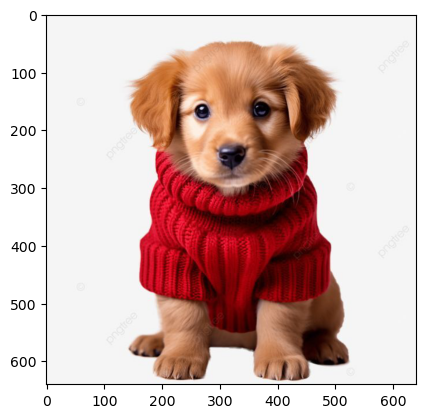

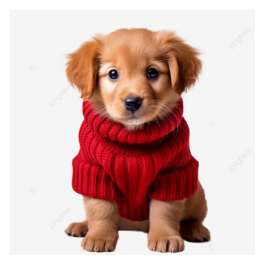

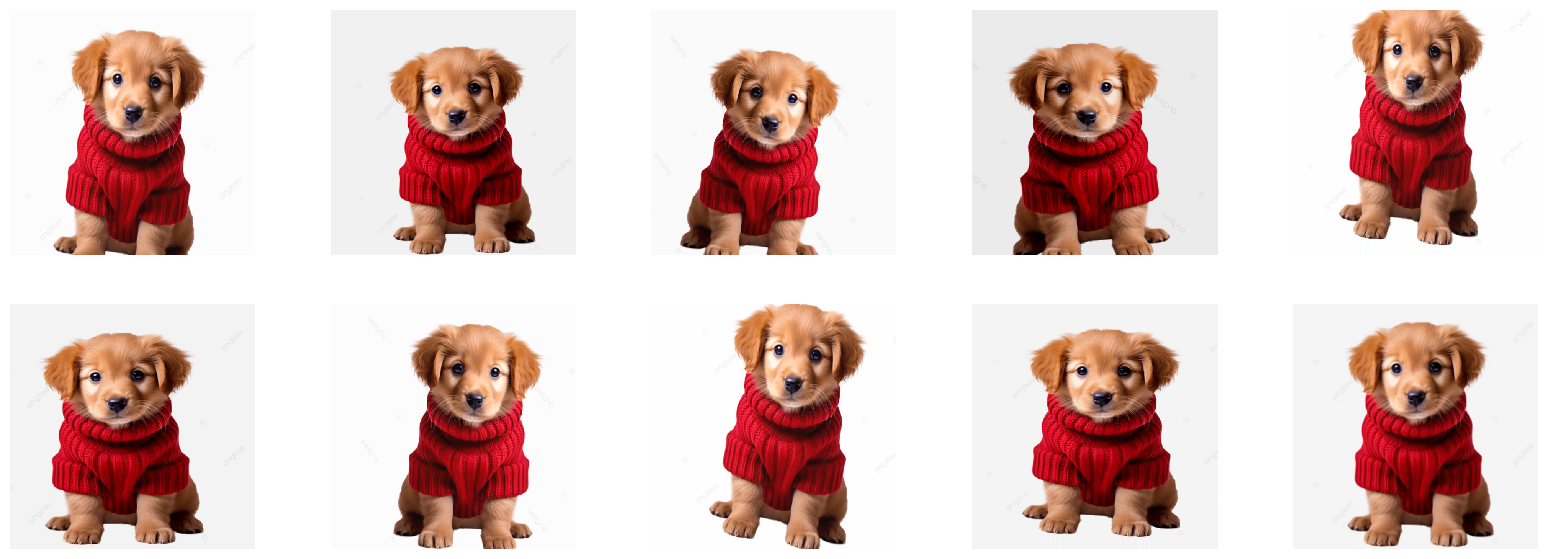

In [40]:
plt.imshow(image[0])
plt.axis("off")  # Hide axes for better visualization
plt.show()

In [41]:
aug_iter = gen.flow(image, batch_size=1)
aug_images = [next(aug_iter)[0].astype(np.uint8) for _ in range(10)]

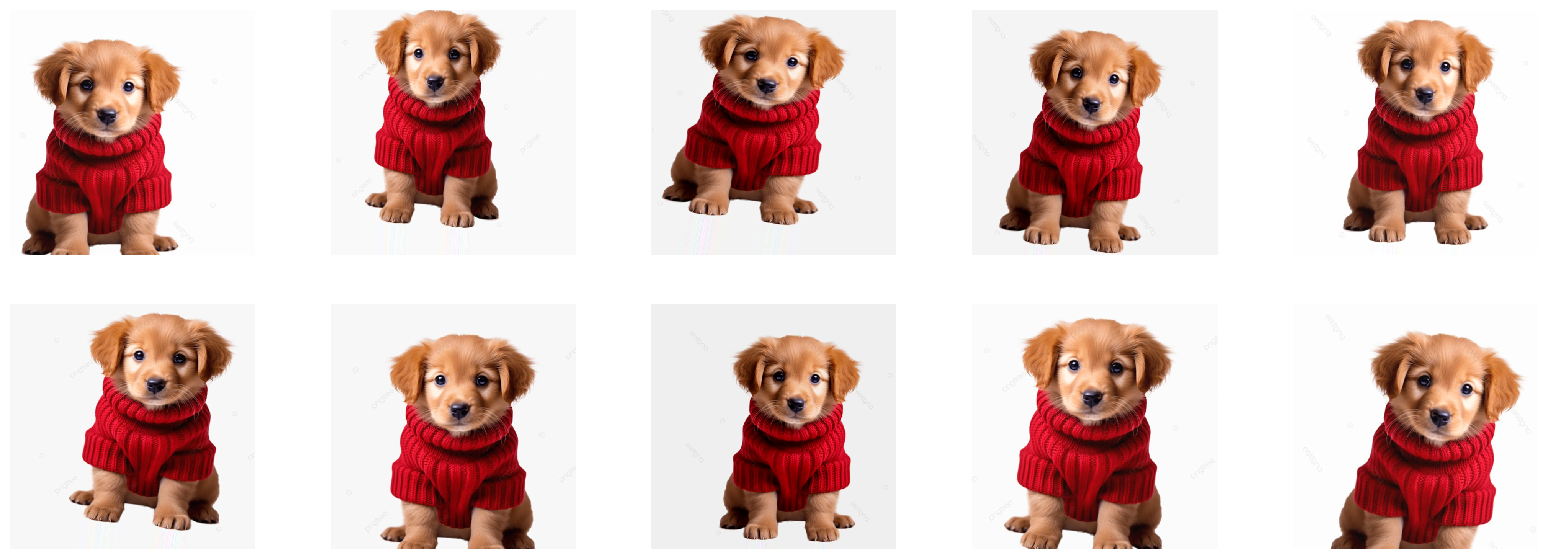

In [42]:
plots(aug_images, figsize=(20, 7), rows=2)